In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main import nmf
np.random.seed(42)

In [2]:
def zeros_mask(arr):
    m, n = arr.shape
    indices = np.random.choice(m * n, replace=False, size=int(m * n * 0.4))
    arr[np.unravel_index(indices, (m, n))] = 0
    return arr


m, n, r_true = 10, 7, 3
W_true = zeros_mask(np.random.rand(m, r_true))
H_true = zeros_mask(np.random.rand(r_true, n))
M = W_true @ H_true

In [3]:
W_true

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.        , 0.        ],
       [0.05808361, 0.86617615, 0.60111501],
       [0.        , 0.        , 0.96990985],
       [0.83244264, 0.21233911, 0.18182497],
       [0.        , 0.        , 0.52475643],
       [0.43194502, 0.        , 0.61185289],
       [0.        , 0.        , 0.        ],
       [0.45606998, 0.78517596, 0.19967378],
       [0.        , 0.59241457, 0.        ]])

In [4]:
H_true

array([[0.96958463, 0.        , 0.93949894, 0.        , 0.59789998,
        0.        , 0.0884925 ],
       [0.19598286, 0.04522729, 0.32533033, 0.38867729, 0.27134903,
        0.        , 0.        ],
       [0.        , 0.54269608, 0.14092422, 0.        , 0.07455064,
        0.98688694, 0.        ]])

In [5]:
r = 6
W_ini = np.random.rand(m, r)
H_ini = np.random.rand(r, n)

### lambda = 0.0

In [6]:
_lambda = 0.0
itermax = 20

W1, H1, scores1 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=_lambda, itermax=itermax, update_ver=1)
W2, H2, scores2 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=_lambda, itermax=itermax, update_ver=2)
W3, H3, scores3 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=_lambda, itermax=itermax, update_ver=3)

0 2.0076373097292475
1 1.042373554105783
2 0.9940220685483236
3 0.9792627672870884
4 0.9708535744699542
5 0.9751280360306293
6 1.0589941367547075
7 1.0448109855380587
8 1.0346380351471134
9 1.0214132493195558
10 1.0093637251597802
11 0.9998075217392041
12 0.99258086876582
13 0.9835584044651394
14 0.9740570691611647
15 0.9649119743304988
16 0.9566423388560825
17 0.9494177797150767
18 0.9432780558203051
19 0.9381195379948315
0 2.937333032148171
1 0.44574258743528933
2 0.34189359542780134
3 0.26057006122278387
4 0.20926258055244165
5 0.1738233303989859
6 0.14709363810574438
7 0.12652506232929775
8 0.11046403298173843
9 0.09776564590153512
10 0.08756905352583645
11 0.07915936065731567
12 0.07211536346600037
13 0.06456941052127209
14 0.05807928002770884
15 0.053886153433692144
16 0.05058374755166006
17 0.04772475070645727
18 0.04526616265011988
19 0.043107274987230715
0 1.7674286811731377
1 1.3970680698205513
2 1.3473082944339223
3 1.3164457109410943
4 1.2942126806623004
5 1.278222724065939

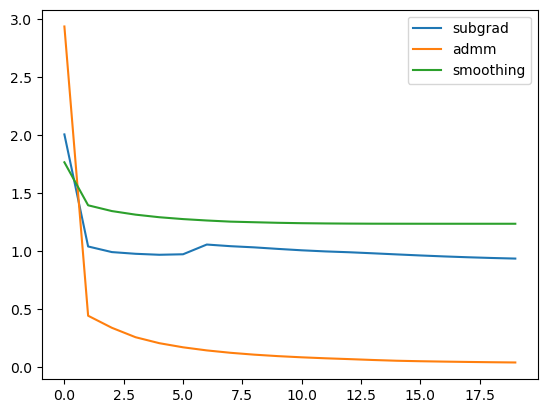

In [7]:
plt.plot(scores1[0])
plt.plot(scores2[0])
plt.plot(scores3[0])
plt.legend(['subgrad', 'admm', 'smoothing'])

In [8]:
_lambda = 0.4
itermax = 20

W1, H1, scores1 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=_lambda, itermax=itermax, update_ver=1)
W2, H2, scores2 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=_lambda, itermax=itermax, update_ver=2)
W3, H3, scores3 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=_lambda, itermax=itermax, update_ver=3)

0 2.0076373097294353
1 1.0423735132076817
2 0.9940220649400869
3 0.9792626645710245
4 0.970853482159027
5 0.9751596017039829
6 1.0589771274907613
7 1.044807563549823
8 1.0346332359500763
9 1.0214090700712106
10 1.0093601133107024
11 0.9998048139596564
12 0.992578947156269
13 0.9835565753878163
14 0.9740544765104319
15 0.9649093839414191
16 0.9566398536120247
17 0.9494152226513505
18 0.9432759399232832
19 0.938117947495976
0 3.011576616453161
1 1.3922184516739113
2 0.737052072970089
3 0.3782119548988055
4 0.2402209595116161
5 0.185077797436231
6 0.15187099843385846
7 0.13212388420872173
8 0.12023755814257825
9 0.10803453937918683
10 0.10046442345245989
11 0.09401802373743007
12 0.09254451130928358
13 0.09136568640450654
14 0.08760272982666142
15 0.0874455331084124
16 0.09125829595770571
17 0.09095669076112878
18 0.09272663168674994
19 0.08408135970766513
0 1.7674286811731377
1 1.3970680698205515
2 1.3473082944339392
3 1.3164457109411307
4 1.294212680662347
5 1.2782227240659894
6 1.26611

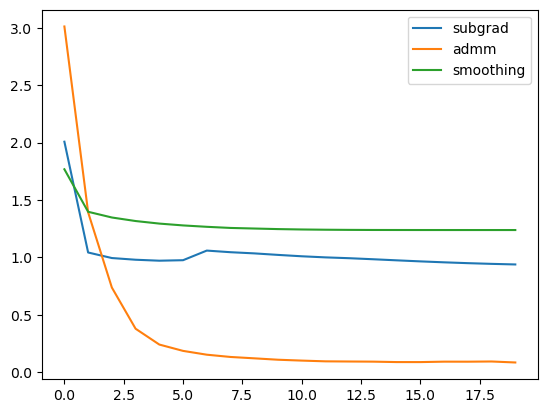

In [9]:
plt.plot(scores1[0])
plt.plot(scores2[0])
plt.plot(scores3[0])
plt.legend(['subgrad', 'admm', 'smoothing'])

In [10]:
# _lambda = 0.0
itermax = 20

W1, H1, scores1 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=0, itermax=itermax, update_ver=2)
W2, H2, scores2 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=0.3, itermax=itermax, update_ver=2)
W3, H3, scores3 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=0.6, itermax=itermax, update_ver=2)
W4, H4, scores4 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=1, itermax=itermax, update_ver=2)

0 2.937333032148171
1 0.5824590790495753
2 0.3588563703674714
3 0.26454684825397784
4 0.12570764600574943
5 0.10536298267959145
6 0.09525590711892469
7 0.08494557024145129
8 0.0758487129345372
9 0.06850536676651492
10 0.06256879778073517
11 0.057767925509180265
12 0.053770373860890404
13 0.050266520735872434
14 0.04713241602839194
15 0.04424534711217745
16 0.04161919706533149
17 0.03921324546192479
18 0.03699720457061939
19 0.03495087013443767
0 2.993097021943214
1 1.291309966302842
2 0.5510069983118873
3 0.35226884163441935
4 0.21774942891396812
5 0.17665602562209082
6 0.15927798356071096
7 0.15101063339358695
8 0.1394647769998172
9 0.12509008613303976
10 0.11219619967588003
11 0.10085500842491887
12 0.09655977458386851
13 0.0914065678151381
14 0.08953660987304758
15 0.08682993152672795
16 0.08300898915469124
17 0.08597339593971198
18 0.0889503106946548
19 0.08820251546122393
0 3.031284005561103
1 1.4169178754389984
2 1.356251273927534
3 0.720588846781428
4 0.5055118290321723
5 0.3384

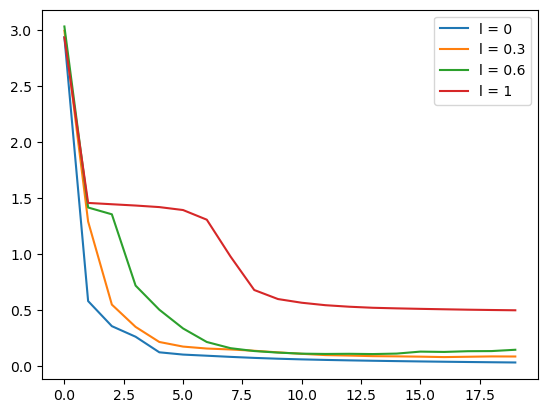

In [11]:
plt.plot(scores1[0])
plt.plot(scores2[0])
plt.plot(scores3[0])
plt.plot(scores4[0])
plt.legend(['l = 0', 'l = 0.3', 'l = 0.6', 'l = 1'])

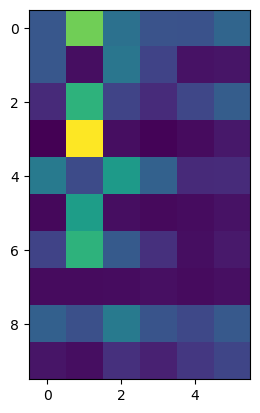

In [12]:
plt.imshow(W4, interpolation='nearest')
plt.show()

In [13]:
np.linalg.norm(W4, axis=0)

array([0.00700261, 0.01850691, 0.00997974, 0.00553553, 0.00432341,
       0.00585645])

In [14]:
np.linalg.norm(W_true, axis=0)

array([1.26078669, 1.63299204, 1.60016959])